In [2]:
import pandas as pd
from fbprophet import Prophet 
import numpy as np
import datetime as dt

In [3]:
data1 = pd.read_csv("./data/hotel_review1.csv", encoding='utf-8-sig')
data2 = pd.read_csv("./data/hotel_review2.csv", encoding='utf-8-sig')
data = pd.concat([data1, data2], axis=0, ignore_index=True)
data

,Unnamed: 0,nickname,score,review,stay_date,label1
0,1,334sunmiy,50,노보텔 동대문 신규 오픈시점에 숙박하게됐습니다 침구도 푹신하고 침대마다 USB po...,2018-06-01,NaN
1,2,jooyeuns,30,이그제큐티브 룸 예약해서 라운지 이용했습니다 라운지 음식은 그렇게 좋은 퀄리티는 아...,2018-06-01,NaN
2,3,Young hoon L,50,지난 6월 30일 와이프의 강력한 요청으로 작년에 갔던 그랜드머큐어를 다시 가려고 ...,2018-06-01,NaN
3,4,Jiyoung W,50,아이파크몰이랑 가까워 먹거리 볼거리 즐길거리 다 있네요 스위트룸 컨디션도 좋았고 한...,2018-06-01,NaN
4,5,수지 김,40,평소에 호텔에 관심이 많아서 같은 도시 내에서도 많이 다니는 편인데 드래곤시티가 새...,2018-06-01,NaN
...,...,...,...,...,...,...
9406,9407,csmin2021,20,화장실 냄새나고 직원불친절 합니다 특히 차량진입 입구 짐내리는곳 티비 동작안되고 5...,2021-07-01,NaN
9407,9408,derprinz2021,10,개관한지 오래되었으면 특급호텔은 리모델링을 해야하는데 욕실 객실카펫등의 룸컨디션이 ...,2021-07-01,NaN
9408,9409,1000022021,10,구경할수 있는 해안가는 모두 막혀 있고 실내 및 야외 수영장은 모두 마스크 벗고 밀...,2021-07-01,NaN
9409,9410,chinhoyu,50,올데이라운지 사용이 매우 좋았습니다 올데이라운지를 사용한다면 트로피칼 3단세트를 추...,2021-07-01,NaN


In [4]:
data = data[['stay_date', 'review']]

In [5]:
data['stay_date'] = pd.to_datetime(data['stay_date'])

<ipython-input-5-c6a94fa58c8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stay_date'] = pd.to_datetime(data['stay_date'])


In [6]:
data.sort_values(by='stay_date', inplace=True)

<ipython-input-6-c05bbd171e1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by='stay_date', inplace=True)


In [7]:
month_count = pd.DataFrame(data.groupby('stay_date')['review'].count())

In [8]:
month_count = month_count.reset_index()
month_count.columns

Index(['stay_date', 'review'], dtype='object')

In [9]:
month_count = month_count.rename(columns={'stay_date':'ds', 'review':'y'})
month_count

,ds,y
0,2018-06-01,72
1,2018-07-01,146
2,2018-08-01,174
3,2018-09-01,162
4,2018-10-01,130
5,2018-11-01,250
6,2018-12-01,331
7,2019-01-01,475
8,2019-02-01,455
9,2019-03-01,387


In [10]:
m = Prophet()
m.fit(month_count)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

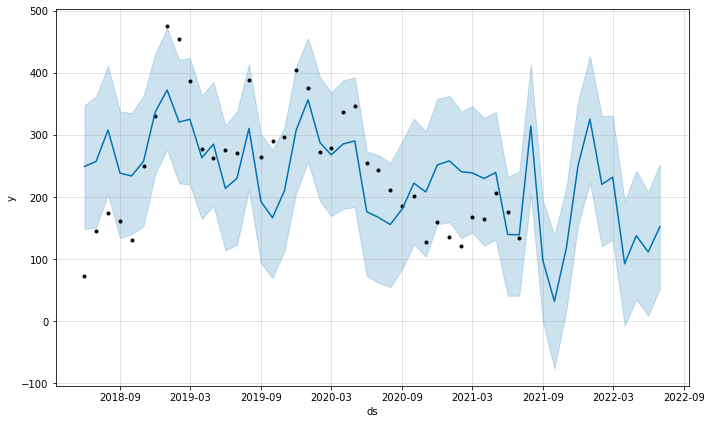

In [28]:
fig1 = m.plot(forecast)

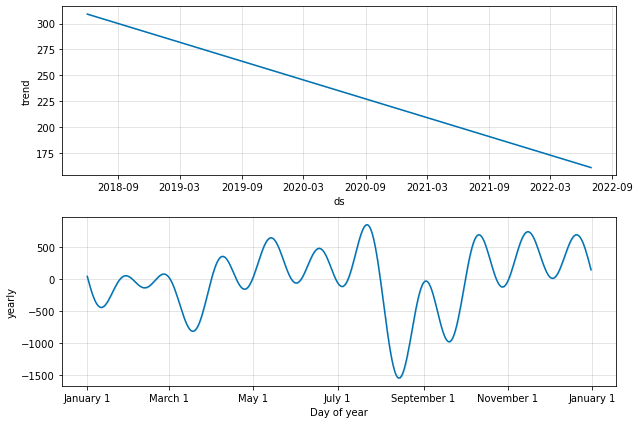

In [29]:
fig2 = m.plot_components(forecast)

In [32]:
model = Prophet(changepoint_prior_scale=10, 
                changepoints=['2020-02-01', '2020-03-01'], 
                yearly_seasonality=10, 
                weekly_seasonality=False, 
                daily_seasonality=False, 
                growth='linear')
model.add_country_holidays(country_name='KR')
model.fit(month_count)
past = model.make_future_dataframe(periods=0, freq='M')

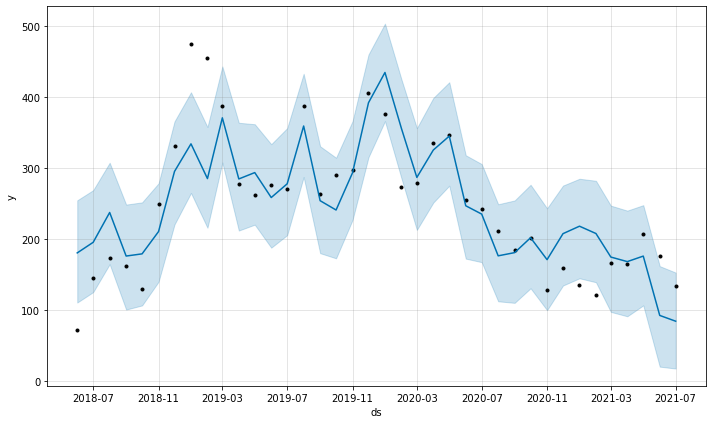

In [34]:
forecast = model.predict(past)
fig1 = model.plot(forecast)

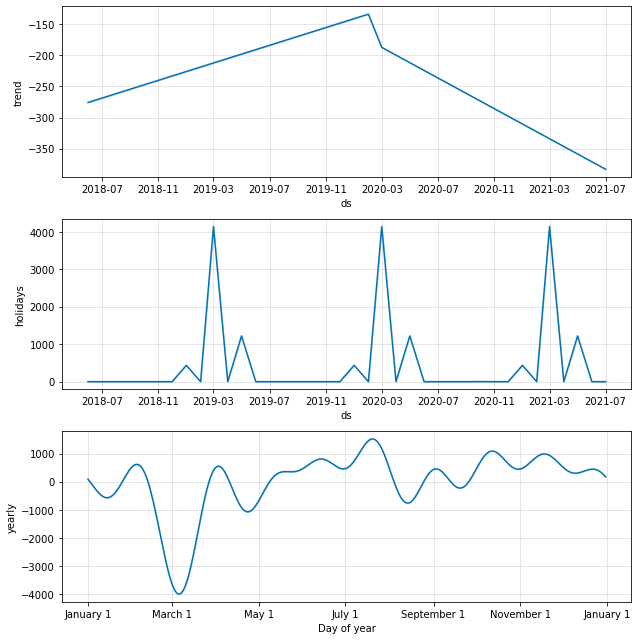

In [35]:
fig2 = model.plot_components(forecast)